<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/P4_GRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practica 4: Segmentación. Extracción de rasgos o características de un objeto de interés</b></center></h1>

---

- **`Nombre:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesor`**: Maria Elena Cruz Meza.
- **`Fecha de entrega`**: 25 de Junio del 2020.
- **`Objetivo`**: Mostrar las habilidades, capacidades y conocimientos adquiridos durante el curso, al resolver un problema implementando tecnicas de Análisis de Imágenes (Operaciones punto a punto, Análisis Espacial y Análisis Morfológico) que permitan extraer algún rasgo ocaracterística de un objeto de interés presente en una imagen digital.


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica3_ME/Imagenes

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Image_analisis/Practica3_ME/Imagenes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [3]:
#Displays an array as an image
def im_show(pic,ip):
    height=pic.shape[0]
    width=pic.shape[1]
    
    print(type(pic))
    channels=1
    if pic.ndim>2:
        channels=3
    #ip="nearest"
    plt.figure(figsize=(10,int(10*float(height)/float(width)) ))
    if channels==1:
        plt.imshow(pic,cmap='gray',interpolation=ip,aspect="auto")
    else:
        plt.imshow(pic,interpolation=ip,aspect="auto")

def im_load(file):
    pic=Image.open(file) #Open the image
    print("Image type:"+str(type(pic))) #Displays the type of image (JPEG, BMP, PNG, GIF, etc)
    pic_arr = np.asarray(pic) #converts the image to an Numpy Array
    print("Dimentions"+str(pic_arr.shape)) #(height,width,#of channels)
    pic_channels=1
    if pic_arr.ndim>2:
        pic_channels=3
    print("Channels:"+str(pic_channels))
    #im_show(pic_arr)
    return pic_arr

def grayscale(pic):
    height=pic.shape[0]
    width=pic.shape[1]
    
    channels=1
    if pic.ndim==3:
        channels=pic.shape[2]
    
    if channels==1:
        return pic

    factor=np.array([0.24,0.65,0.11])
    if channels==4:
        factor=np.array([0.24,0.65,0.11,1])

    pic2=np.dot(pic.astype(dtype=np.float),factor)

    return pic2.astype(dtype=np.uint8)

def validar_pixel(pixel):
    if pixel < 0:
        pixel = 0
    elif pixel > 255:
        pixel = 255
    return pixel

# **Histograma**

In [4]:
def histograma(pic_arr):
    height=pic_arr.shape[0]
    width=pic_arr.shape[1]
    dim = pic_arr.ndim
    if dim == 2:
        hist_gray=np.zeros(256)
        for i in range(0,height):
            for j in range(0, width):
                hist_gray[pic_arr[i,j]]+=1
        return hist_gray
        #plt.plot(hist_gray,color = "black")
    elif dim >=3:
        hist_rgb = np.zeros((3,256))

        ##CODE TO CALCULATE RED, BLUE AND GREEN CHANNEL HISTOGRAM AT THE SAME TIME
        for i in range(height):
            for j in range(width):
                for k in range(pic_arr.shape[2]):
                    hist_rgb[k,pic_arr[i,j,k]] += 1
  
        return hist_rgb
        """plt.plot(hist_rgb[0],color = "r")
        plt.plot(hist_rgb[1],color = "g")
        plt.plot(hist_rgb[2],color = "b")
        plt.show()"""

def imagen_histograma(pic_arr, histograma):
    fig, axs = plt.subplots(1, 2, figsize=(20,5))
    axs[0].imshow(pic_arr, cmap='gray')
    axs[0].set_xlabel("Imagen")
    if histograma.shape[0] == 2:
        axs[1].plot(histograma,color = "black")
    elif histograma.shape[0] >= 3:
        axs[1].plot(histograma[0], color = "r")
        axs[1].plot(histograma[1], color = "g")
        axs[1].plot(histograma[2], color = "b")
    axs[1].set_xlabel("Histograma")

# **Filtros paso-altas**

In [5]:
def kernel_espejo(kernel):
    new_kernel = np.rot90(kernel,2)
    return new_kernel

def convolusion(image, kernel, inicio_x, inicio_y):
    if(image.ndim == 3):
        image = grayscale(image)
    height = image.shape[0]
    width = image.shape[1]
    kernel = kernel_espejo(kernel)
    h_kernel = kernel.shape[0]
    w_kernel = kernel.shape[1]
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = image.copy()
    for i in range(0, height):
        for j in range(0, width):
            res = 0.0
            conter_i = i
            for k_i in range(0,h_kernel):
                conter_j = j
                for k_j in range(0,w_kernel):
                    tem = float(img_t[conter_i, conter_j])*float(kernel[k_i, k_j])
                    res+=tem
                    conter_j+=1
                conter_i+=1
            img_r[i,j] = int(validar_pixel(round(res)))
    return img_r

# **Umbralización**

In [6]:
def calculo(segmento):
    T = np.mean(segmento)
    for i in range(0,segmento.shape[0]):
        for j in range(0, segmento.shape[1]):
            if(segmento[i,j] < T):
                segmento[i,j] = 0
            elif(segmento[i,j] >= T):
                segmento[i,j] = 1
    return segmento

def umbral_adaptativo(arr_pic, particion):
    resultado = arr_pic.copy()
    y = 0
    x = 0
    if(particion%2 == 0):
        x = int(particion/2)
        y = int(particion/2)
    else:
        x = int(particion/2)+1
        y = int(particion/2)
    p_x = int(resultado.shape[0]/(x+1))
    p_y = int(resultado.shape[1]/(y+1))
    limite1x = 0 
    limite1y = 0
    limite2x = p_x
    limite2y = p_y
    for i in range(0,x+1):
        for j in range(0,y+1):
            if(i == x):
                resultado[limite1x:resultado.shape[0]+1, limite1y:limite2y] = calculo(resultado[limite1x:resultado.shape[0]+1, limite1y:limite2y])
            elif(j == y):
                resultado[limite1x:limite2x, limite1y:resultado.shape[1]+1] = calculo(resultado[limite1x:limite2x, limite1y:resultado.shape[1]+1])
            else:
                resultado[limite1x:limite2x, limite1y:limite2y] = calculo(resultado[limite1x:limite2x, limite1y:limite2y])
            limite1y = limite1y+p_y
            limite2y = limite2y+p_y
        limite1x = limite1x+p_x
        limite2x = limite2x+p_x
        limite1y = 0
        limite2y = p_y
    return resultado

def umbral(arr_pic, umbral):
    resultado = arr_pic.copy()
    for i in range(0, resultado.shape[0]):
        for j in range(0, resultado.shape[1]):
            if(resultado[i,j] < umbral):
                resultado[i,j] = 0
            elif(resultado[i,j] >= umbral):
                resultado[i,j] = 1
    return resultado

# **Operaciones puntuales**

In [7]:
def resta(arr_pic1, arr_pic2):
    res = arr_pic1.copy()
    for i in range(0, arr_pic1.shape[0]):
        for j in range(0, arr_pic1.shape[1]):
            res[i,j] = arr_pic1[i,j]-arr_pic2[i,j]
    return res

# **Morfologia binaria**

In [8]:
def erosion(arr_pic, ee, inicio_x, inicio_y):
    height = arr_pic.shape[0]
    width = arr_pic.shape[1]
    h_ee = ee.shape[0]
    w_ee = ee.shape[1]
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+h_ee-1, width+w_ee-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = arr_pic.copy()
    for i in range(0,height):
        for j in range(0, width):
            temporal = []
            conter_i = i
            for k_i in range(0, h_ee):
                conter_j = j
                for k_j in range(0, w_ee):
                    if(ee[k_i, k_j] != 0):
                        temporal.append(img_t[conter_i, conter_j])
                    conter_j+=1
                conter_i+=1
            if 0 in temporal:
                img_r[i,j] = 0
            else:
                img_r[i,j] = 1
    return img_r

def dilatacion(arr_pic, ee, inicio_x, inicio_y):
    height = arr_pic.shape[0]
    width = arr_pic.shape[1]
    h_ee = ee.shape[0]
    w_ee = ee.shape[1]
    ee = np.rot90(ee)
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+h_ee-1, width+w_ee-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = arr_pic.copy()
    for i in range(0,height):
        for j in range(0, width):
            temporal = []
            conter_i = i
            for k_i in range(0, h_ee):
                conter_j = j
                for k_j in range(0, w_ee):
                    if(ee[k_i, k_j] != 0):
                        temporal.append(img_t[conter_i, conter_j])
                    conter_j+=1
                conter_i+=1
            if 1 in temporal:
                img_r[i,j] = 1
            else:
                img_r[i,j] = 0
    return img_r

# **Morfologia en Laticces**

In [9]:
def erosion_gray(arr_pic, ee, inicio_x, inicio_y):
    height = arr_pic.shape[0]
    width = arr_pic.shape[1]
    h_ee = ee.shape[0]
    w_ee = ee.shape[1]
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+h_ee-1, width+w_ee-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = arr_pic.copy()
    for i in range(0,height):
        for j in range(0, width):
            temporal = []
            conter_i = i
            for k_i in range(0, h_ee):
                conter_j = j
                for k_j in range(0, w_ee):
                    if(ee[k_i, k_j] != 0):
                        temporal.append(img_t[conter_i, conter_j]-ee[k_i, k_j])
                    conter_j+=1
                conter_i+=1
            img_r[i,j] = validar_pixel(min(temporal))
    return img_r

def dilatacion_gray(arr_pic, ee, inicio_x, inicio_y):
    height = arr_pic.shape[0]
    width = arr_pic.shape[1]
    h_ee = ee.shape[0]
    w_ee = ee.shape[1]
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+h_ee-1, width+w_ee-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = arr_pic.copy()
    for i in range(0,height):
        for j in range(0, width):
            temporal = []
            conter_i = i
            for k_i in range(0, h_ee):
                conter_j = j
                for k_j in range(0, w_ee):
                    if(ee[k_i, k_j] != 0):
                        temporal.append(img_t[conter_i, conter_j]+ee[k_i, k_j])
                    conter_j+=1
                conter_i+=1
            img_r[i,j] = validar_pixel(max(temporal))
    return img_r

# **Estructura de elementos**

In [10]:
cruz = np.array([[0,1,0],
                 [1,1,1],
                 [0,1,0]])
ee1 = np.array([[0,1],
                [1,1]])
ee2 = np.array([[1,1],
                [0,1]])
cruz2 = np.array([[0,0,1,0,0],
                  [0,0,1,0,0],
                  [1,1,1,1,1],
                  [0,0,1,0,0],
                  [0,0,1,0,0]])

# **Kernels**

In [11]:
laplaciano = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])

laplaciano2 = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

In [12]:
ruta = "./"
nombre1 = "carta-inlgesa-10-corazones.jpg"

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(177, 220, 3)
Channels:3


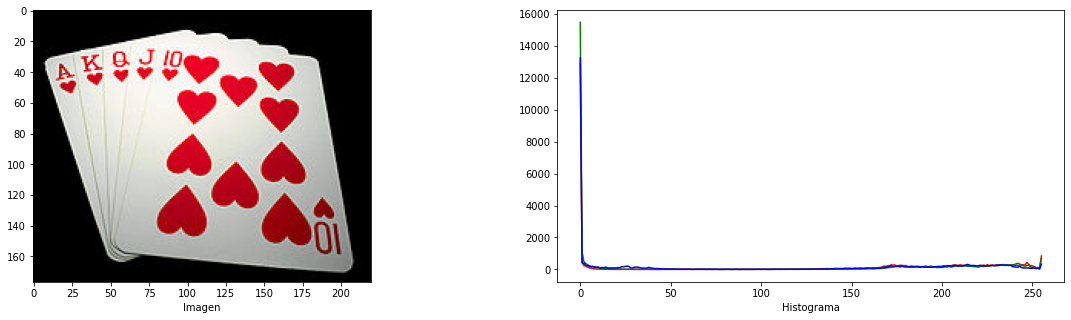

In [13]:
arr_pic1 = im_load(ruta+nombre1)
hist = histograma(arr_pic1)
imagen_histograma(arr_pic1,hist)
#im_show(arr_pic1,"nearest")

# **Paso 1**

Se pasa la imagen a escala de grises

<class 'numpy.ndarray'>


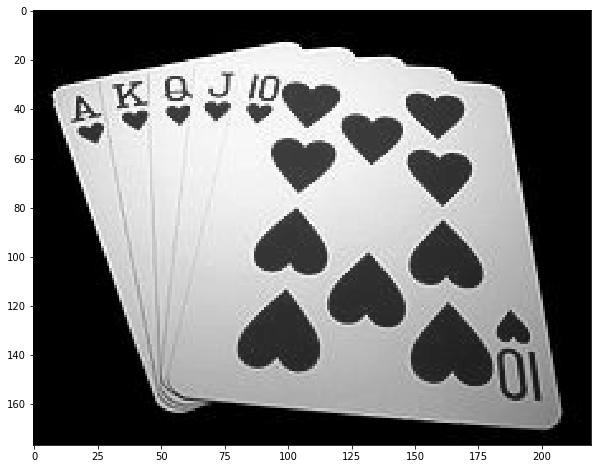

In [14]:
gray_pic = grayscale(arr_pic1)
im_show(gray_pic,"nearest")

# **Paso 2**

Aplicamos una clausura a la imagen es escala de grises, por lo que aplicaremos una dilatacion seguida de una erosion

<class 'numpy.ndarray'>


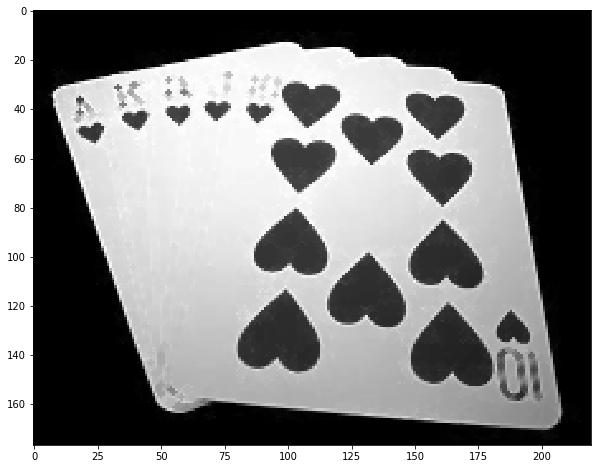

In [15]:
dil_gray = dilatacion_gray(gray_pic,cruz,1,1)
clausura = erosion_gray(dil_gray, cruz,1,1)
im_show(clausura,"nearest")

# **Paso 3**

Se aplica umbralizacion adaptativa para segmentar la imagen, se escogen 3 segmentos

<class 'numpy.ndarray'>


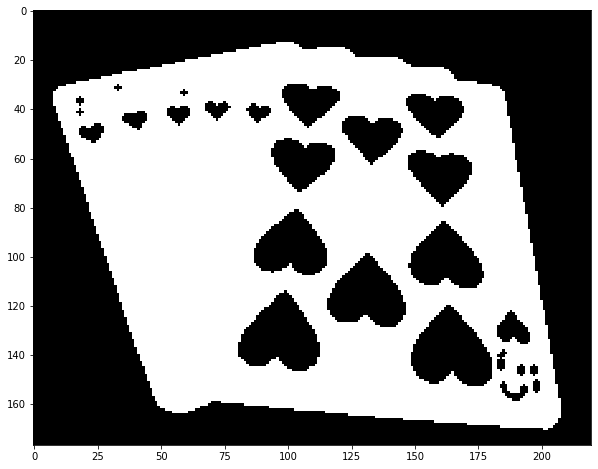

In [16]:
umbralado = umbral_adaptativo(clausura,3)
im_show(umbralado,"nearest")

# **Paso 4**

Se aplica una dilatación binaria a la imagen resultante del umbralada adaptativo

<class 'numpy.ndarray'>


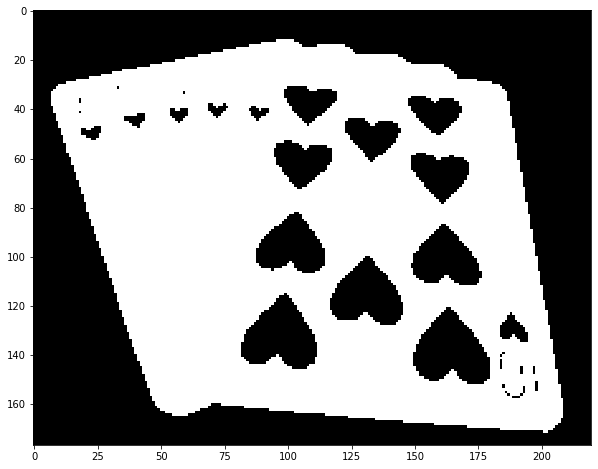

In [17]:
dil_bin = dilatacion(umbralado,cruz,1,1)
im_show(dil_bin,"nearest")

# **Paso 5**

De la imagen original en grises hacemos una umbralizacion con un valor de umbral de 28

<class 'numpy.ndarray'>


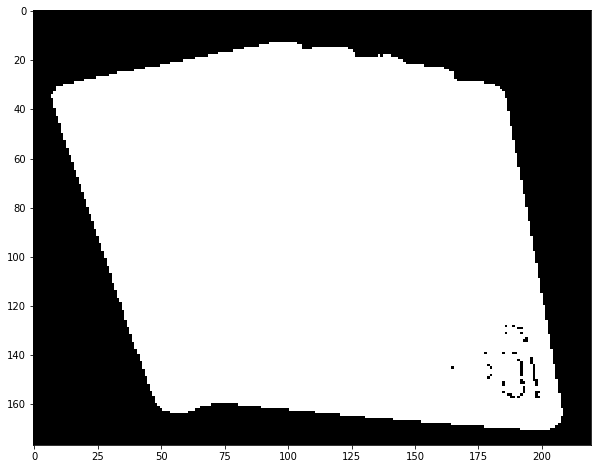

In [18]:
umb = umbral(gray_pic, 28)
im_show(umb,"nearest")

## **Paso 6**

Realizamos una resta entre el resultado del umbralado y la dilatacion binaria

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


<class 'numpy.ndarray'>


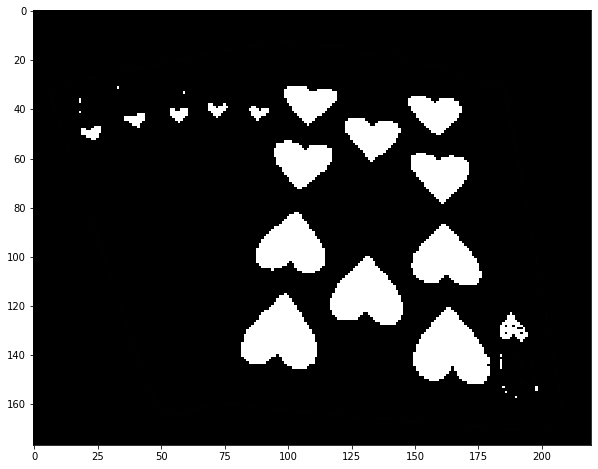

In [19]:
res = resta(dil_bin,umb)
im_show(res,"nearest")

# **Paso 7**

Realizamos una clausura a la imagen resultante

<class 'numpy.ndarray'>


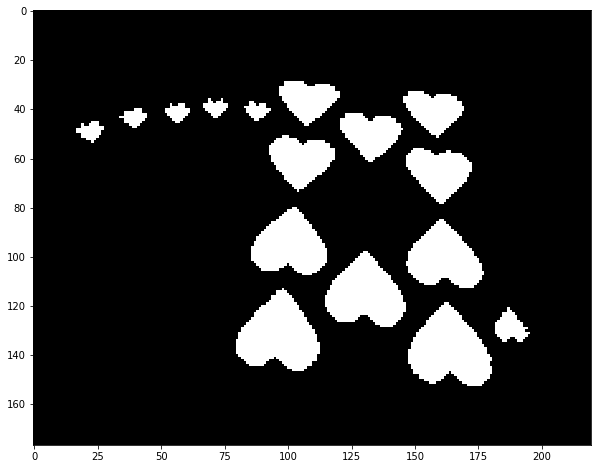

In [20]:
final_dil = erosion(res,ee1,1,1)
final_cierre = dilatacion(final_dil,cruz2,1,1)
im_show(final_cierre,"nearest")

# **Proceso completo**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


<class 'numpy.ndarray'>


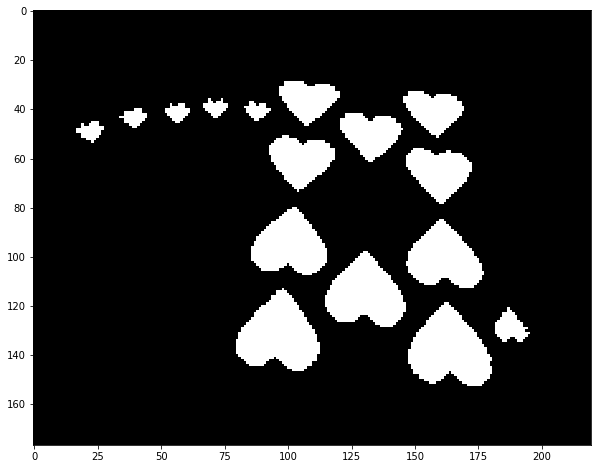

In [21]:
dil_gray = dilatacion_gray(gray_pic,cruz,1,1)
clausura = erosion_gray(dil_gray, cruz,1,1)
umbralado = umbral_adaptativo(clausura,3)
dil_bin = dilatacion(umbralado,cruz,1,1)
umb = umbral(gray_pic, 28)
res = resta(dil_bin,umb)
final_dil = erosion(res,ee1,1,1)
final_cierre = dilatacion(final_dil,cruz2,1,1)
im_show(final_cierre,"nearest")

<class 'numpy.ndarray'>


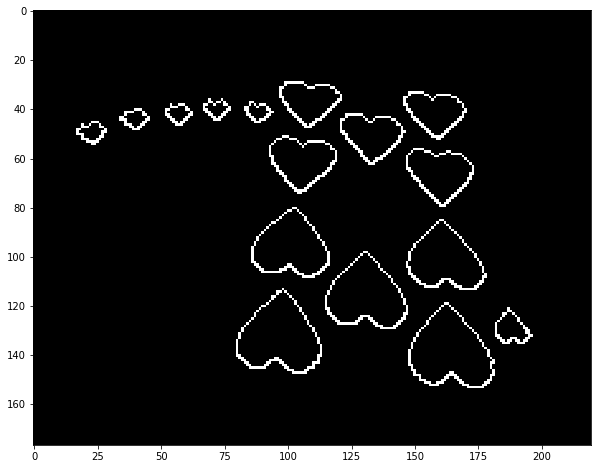

In [22]:
ero_grad = erosion(final_cierre,ee1,1,1)
dil_grad = dilatacion(final_cierre,ee1,1,1)
gradiente = resta(dil_grad,ero_grad)
im_show(gradiente,"nearest")